# Basic Regression and Classification 

Goals:
* Look at a 1D linear regression with scikit-learn
* Extend to linear regression with several inputs
* Apply to logistic regression

Outcomes:
* Understanding of regression and classification problems
* Practice with dataset manipulation
* Practice with scikit-learn
* Building metrics for evaluating model performance

## Simple Linear Regression Example

Loading the necessary modules

In [233]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

Load the penguin dataset (a CSV file) using the `pnadas` module

In [234]:
input_penguins_df = pd.read_csv("../Downloads/penguins.csv")

Some data pre-processing:since some of the entries don't exist in the dataset, we drop them using the following line.

In [235]:
penguins_df = input_penguins_df.dropna(inplace=False)

We will start by extracting only two fields, and using one as an input to regress the other: simple linear regression

In [236]:
input_features = penguins_df["flipper_length_mm"].values
target         = penguins_df["body_mass_g"].values

It's useful to get a feel for the data by plotting it. The following scatterplot indicates that the data will be modelled reasonably well by a linear fit i.e. linear regression is an appropriate tool

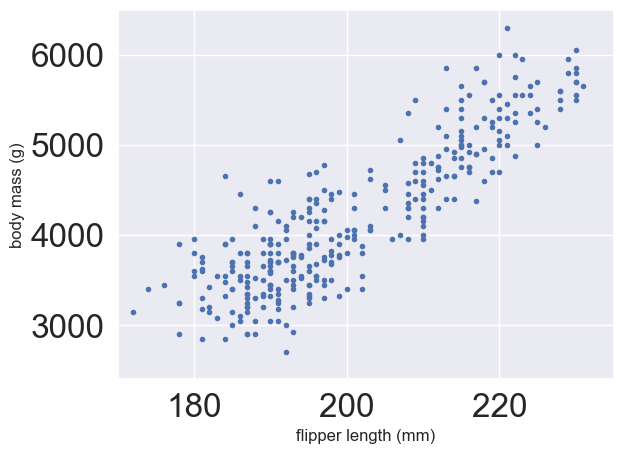

In [237]:
fig, ax = plt.subplots()

def plot_regression_problem(ax, xlow=170, xhigh=235, ylow=2400, yhigh=6500):
    ax.scatter(data[:,0], data[:,1], marker=".")
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("flipper length (mm)")
    ax.set_ylabel("body mass (g)")

plot_regression_problem(ax)

plt.show()

We begin by using the `LinearRegression` model from `scikit-learn` 

This method applies the ordinary least squares solution, minimising the squared error between the data and the predictions analytically.

In [238]:
from sklearn.linear_model import LinearRegression

The `LinearRegression` model expects our input data to be passed as a column vector, so we need to re-shape `input_features` and call it `X` for brevity. We'll call the `target` array `y_true`

In [239]:
X = input_features.reshape(-1,1)
y_true = target

Defining the model and then doing the fit is a simple two-line procedure!

In [247]:
model = LinearRegression()
model.fit(X, y_true)

LinearRegression()

The fitted model can now be used to make predictions on our input data. We use the `.predict` functionality of our model

In [246]:
example_flipper_length = 200
example_body_mass = model.predict([[example_flipper_length]])
print(example_body_mass)

[4158.56050561]


And so for all the input data:

In [241]:
y_pred = model.predict(X)

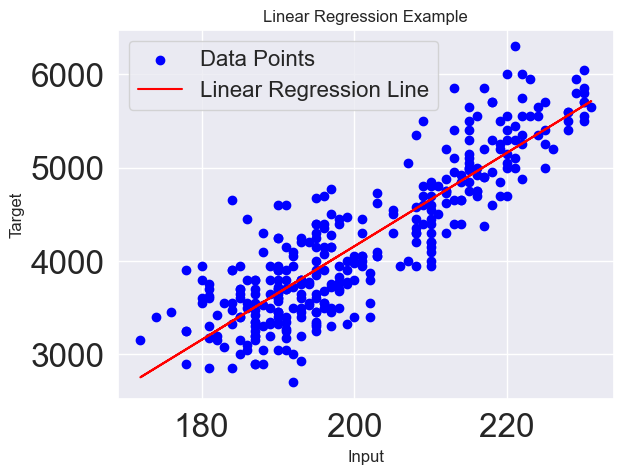

Slope (coefficient): 50.15326594224118
Intercept: -5872.0926828428355


In [242]:
# Plot the original data and the linear regression line
plt.scatter(X, y_true, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print out the model parameters (slope and intercept)
print(f"Slope (coefficient): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

Finally, it's important to find a metric to quantify the "goodness of fit". Many metrics are available; there's no one best choice...

Scikit-learn by default uses something called the *coefficient of determination* which is 0 for a useless model and 1 for a perfect fit

In [31]:
# Note that this is evaluated on the targets, not the predictions
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")

R-squared: 0.7620921573403914


## Multiple Linear Regression

Extend this to multiple linear regression by passing a multi-dimensional array of input_features into a new model.
See if you can improve the R-squared score

# Classification

In this classification task, we want to predict the species from the bill dimensions. Just like regression, this is trivial in scikit-learn.

Let's first plot how the data look...

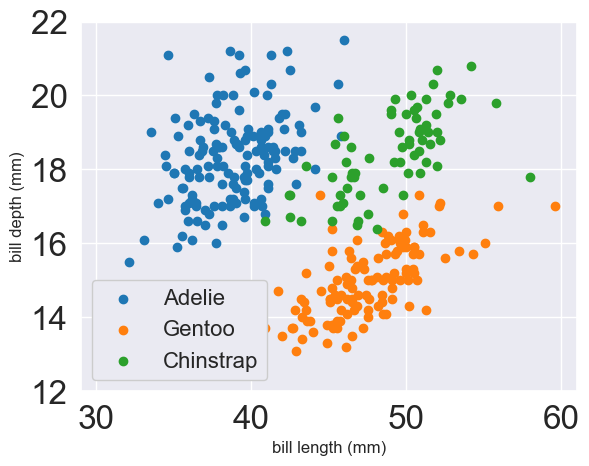

In [216]:
fig, ax = plt.subplots()

def plot_categorical_problem(ax, xlow=29, xhigh=61, ylow=12, yhigh=22):
    # Create 3 separate dataframes, one for each species. We use the target array as a mask
    df_Adelie = penguins_df[penguins_df["species"] == "Adelie"]
    df_Gentoo = penguins_df[penguins_df["species"] == "Gentoo"]
    df_Chinstrap = penguins_df[penguins_df["species"] == "Chinstrap"]

    # Plot each species separately with individual colour
    ax.scatter(df_Adelie["bill_length_mm"], df_Adelie["bill_depth_mm"], color="tab:blue", label="Adelie")
    ax.scatter(df_Gentoo["bill_length_mm"], df_Gentoo["bill_depth_mm"], color="tab:orange", label="Gentoo")
    ax.scatter(df_Chinstrap["bill_length_mm"], df_Chinstrap["bill_depth_mm"], color="tab:green", label="Chinstrap")

    # Set plot parameters - less important
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("bill length (mm)")
    ax.set_ylabel("bill depth (mm)")

    ax.legend(loc="lower left", framealpha=1)

plot_categorical_problem(ax)

plt.show()

The three species show reasonable separation.

The only complexity is that the classification model we're about to define (and indeed all statistical /  machine learning models) can only deal with numerical data, so we need to convert the three species into unique numerical information.

We will assign Adelie=0, Gentoo=1 and Chinstrap=2. These numbers have no real meaning, they're just necessary numerical placeholders for the species names. The model will output a 0, 1 or 2.

The way to do this with a for loop would be...

In [217]:
target = []
for species in penguins_df["species"]:
    if species == "Adelie":
        target.append(0)    
    elif species == "Gentoo":            
        target.append(1)
    else:
        target.append(2)  
        
target = np.array(target)  
          

However, there's actually a smarter way using the `pandas` factorise function...

In [218]:
target, species_names = pd.factorize(penguins_df["species"])

In [219]:
X = penguins_df[["bill_length_mm", "bill_depth_mm"]].values

In [220]:
from sklearn.linear_model import LogisticRegression

In [221]:
model = LogisticRegression()
best_fit = model.fit(X, target)

Let's evaulate the model on a random data entry (in this case the 100th data point), and verify that the output is sensible

In [222]:
random_datapoint_features = X[100].reshape(-1,2) # It needs to be reshaped because it's a single sample
random_datapoint_probabilities = best_fit.predict_proba(random_datapoint_features)
print(random_datapoint_probabilities)

[[9.94867319e-01 5.01160255e-05 5.08256492e-03]]


The output is a vector of probabilities corresponding the case Adelie, Gentoo and Chinstrap cases. And as expected with the softmax function, the probabilities sum ot unity:

In [223]:
np.sum(random_datapoint_probabilities)

1.0

Let's now classify data entry and evalulate the model performance.

We predict the probabilities of each data point, then select the largest one using `np.argmax`. This is a clever way of achieving the predicted class quickly which was possible because we labelled our classes [0,1,2]

In [224]:
# Feed in the input_features array to get the probabilities for each class
output_probabilities = best_fit.predict_proba(X)

# Find the index of the entry with the highest probabiltity as this corresponds directly to the class label
predicted_class = np.argmax(output_probabilities,axis=1)

In [225]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target, predicted_class)
print(accuracy)


0.963963963963964


In [226]:
# Draw a confusion matrix   
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target, predicted_class)
print(conf_matrix)

[[144   0   2]
 [  0 117   2]
 [  4   4  60]]


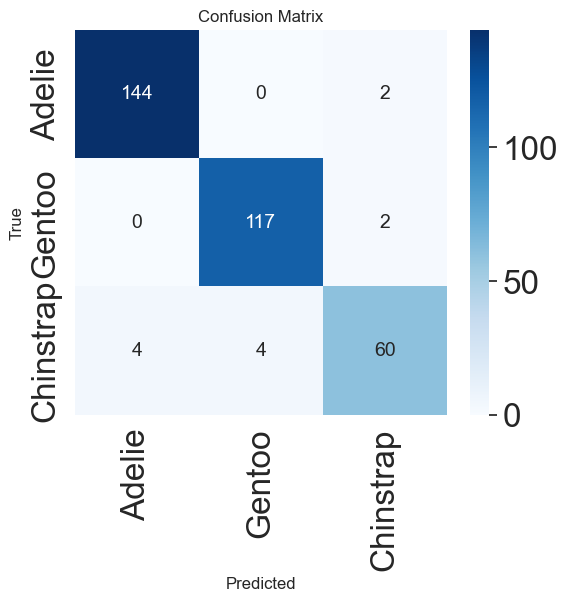

In [227]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
conf_matrix = confusion_matrix(target, predicted_class)

# Class names
class_names = ["Adelie", "Gentoo", "Chinstrap"]

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Set the labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [212]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(target, predicted_class, average='weighted')
recall = recall_score(target, predicted_class, average='weighted')
f1 = f1_score(target, predicted_class, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")         
print(f"F1 Score: {f1}")

Precision: 0.9635740833529532
Recall: 0.963963963963964
F1 Score: 0.9635543242686099


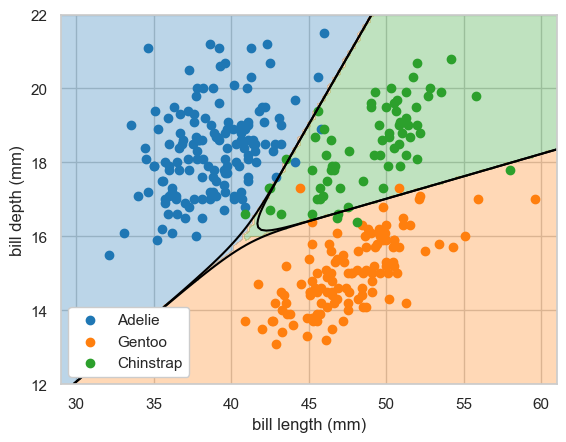

In [ ]:
fig, ax = plt.subplots()

def plot_categorical_solution(ax, model, xlow=29, xhigh=61, ylow=12, yhigh=22):
    from matplotlib.colors import ListedColormap

    # Compute the probabilities for every 2D point in the background
    background_x, background_y = np.meshgrid(np.linspace(xlow, xhigh, 100), np.linspace(ylow, yhigh, 100))
    background_2d = np.column_stack([background_x.ravel(), background_y.ravel()])
    probabilities = model(background_2d)
    
    # Determine the predicted class for each point
    predicted_classes = np.argmax(probabilities, axis=1).reshape(background_x.shape)
    
    # Define colors for each class
    # cmap = plt.cm.get_cmap("Pastel1", len(colors))  # Create a colormap for the classes
    classic_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green
    cmap = ListedColormap(classic_colors)

    
    # Fill the regions with colors corresponding to the predicted classes
    ax.contourf(background_x, background_y, predicted_classes, levels=np.arange(-0.5, len(classic_colors) + 0.5, 1), cmap=cmap, alpha=0.3)
    
    # Draw contour lines where the probabilities cross the 50% threshold
    ax.contour(background_x, background_y, probabilities[:, 0].reshape(background_x.shape), [0.5], colors="black", linestyles="-")
    ax.contour(background_x, background_y, probabilities[:, 1].reshape(background_x.shape), [0.5], colors="black", linestyles="-")
    ax.contour(background_x, background_y, probabilities[:, 2].reshape(background_x.shape), [0.5], colors="black", linestyles="-")

# Call the function with your model
plot_categorical_solution(ax, lambda x: best_fit.predict_proba(x))
plot_categorical_problem(ax)

# Show the plot
plt.show()